# Task Selection for MTEB(EU)


In [1]:
from __future__ import annotations

import mteb

print(mteb.__version__)

/Users/au561649/.virtualenvs/mteb/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.12.48


## Loading in data
We will start out by loading in the relevant data for the model and tasks of interests.

In [2]:
def get_models():
    model_names = [
        "sentence-transformers/all-MiniLM-L6-v2",
        "sentence-transformers/all-MiniLM-L12-v2",
        "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
        "sentence-transformers/paraphrase-multilingual-mpnet-base-v2",
        "sentence-transformers/all-mpnet-base-v2",
        "sentence-transformers/LaBSE",
        "intfloat/multilingual-e5-large-instruct",
        "intfloat/e5-mistral-7b-instruct",
        "GritLM/GritLM-7B",
        "GritLM/GritLM-8x7B",
        "intfloat/multilingual-e5-small",
        "intfloat/multilingual-e5-base",
        "intfloat/multilingual-e5-large",
    ]
    models: list[mteb.ModelMeta] = [mteb.get_model_meta(name) for name in model_names]

    # get missing revisions - Assuming we are using the latest revision
    for model in models:
        if model.revision is None:
            print(f"Getting revision for {model.name}")
            encoder = model.load_model()
            model.revision = encoder.model_card_data.base_model_revision  # type: ignore

    return models


models = get_models()

Getting revision for sentence-transformers/all-MiniLM-L12-v2
Getting revision for sentence-transformers/all-mpnet-base-v2


In [3]:
# load tasks
eu_languages = [
    # official EU languages (56) - we could include the whole economic area e.g. Norway - additioanlly we could include minority languages (probably a good idea?)
    # germanic
    "dan",
    "eng",
    "deu",
    "nld",
    "swe",
    # romance
    "fra",
    "ita",
    "por",
    "spa",
    "ron",
    # slavic
    "bul",
    "hrv",
    "ces",
    "pol",
    "slk",
    "slv",
    # baltic
    "lav",
    "lit",
    "est",
    # finno-ugric
    "fin",
    "hun",
    # other indo european
    "ell",
    # non-indo european
    "mlt",
    "gle",
    # Shengen Area
    "nno",
    "nob",
    "isl",
    "ron",
    "eus",  # Basque - recognized minority language
    "ron",  # Romanian - recognized minority language
]


eu_tasks = mteb.get_tasks(
    languages=eu_languages,
)  # does not need to language - you can also filter by task types, domains, etc.

print(f"Number of tasks: {len(eu_tasks)}")

Number of tasks: 420


In [4]:
not_include = [
    "DKHateClassification",  # # due to it being a gated dataset on huggingface (requiring to sign a form)
    # was added after models were run
    "SouthAfricanLangClassification",
    "BrightRetrieval",
    "LitSearchRetrieval",
    "MSMARCO",
    "SpanishPassageRetrievalS2P",
    "XStance",
    "MIRACLReranking",
    "SICK-BR-STS",
    "PublicHealthQA",  # some error in initial run of the dataset
    # model model had an error on this - likely contains empty examples:
    "YahooAnswersTopicsClassification",
    "FrenchBookReviews",
    "SlovakSumRetrieval",
    "LegalBenchPC",
    "RomanianSentimentClassification",
    "GPUSpeedTask",  # for speed testing
    "CPUSpeedTask",  # for speed testing
    "MSMARCOv2",  # too large to be practical for a benchmark
    "SIB200Classification",  # we will be using the SIB200 dataset for Cluster Classification so as they are the same dataset we will not include this one
    "SummEval",  # due to https://github.com/embeddings-benchmark/mteb/issues/1156
]
retrieval_to_be_downsampled = [  # TODO: Removing this list when tasks are ready
    "TopiOCQA",
    "MSMARCO-PL",
    "ClimateFEVER",
    "FEVER",
    "HotpotQA",
    "HotpotQA-PL",
    "DBPedia",
    "DBPedia-PL",
    "NeuCLIR2022Retrieval",
    "NeuCLIR2023Retrieval",
    "NeuCLIR2022Retrieval",
    "NeuCLIR2023Retrieval",
    "NQ",
    "NQ-PL",
    "NeuCLIR2022Retrieval",
    "NeuCLIR2023Retrieval",
    "MIRACLRetrieval",
    "RiaNewsRetrieval",
    "Quora-PL",
    "QuoraRetrieval",
]
not_include += retrieval_to_be_downsampled

eu_tasks = [t for t in eu_tasks if t.metadata.name not in not_include]
# exlude machine translated tasks
eu_tasks = [
    t
    for t in eu_tasks
    if t.metadata.sample_creation
    not in [
        "machine-translated",
        "machine-translated and verified",
        "machine-translated and localized",
    ]
]

print(f"Number of tasks after filtering: {len(eu_tasks)}")

Number of tasks after filtering: 381


In [5]:
# load results from mteb/results repository
mteb_results = mteb.load_results(models=models, tasks=eu_tasks, download_latest=False)

In [6]:
mteb_results

{'intfloat/multilingual-e5-small': {'e4ce9877abf3edfe10b0d82785e83bdcb973e22e': [MTEBResults(task_name=IndicGenBenchFloresBitextMining, scores=...),
   MTEBResults(task_name=PpcPC, scores=...),
   MTEBResults(task_name=TwentyNewsgroupsClustering.v2, scores=...),
   MTEBResults(task_name=FinancialPhrasebankClassification, scores=...),
   MTEBResults(task_name=TenKGnadClusteringP2P.v2, scores=...),
   MTEBResults(task_name=CUADRevenueProfitSharingLegalBenchClassification, scores=...),
   MTEBResults(task_name=AfriSentiClassification, scores=...),
   MTEBResults(task_name=FaithDial, scores=...),
   MTEBResults(task_name=NYSJudicialEthicsLegalBenchClassification, scores=...),
   MTEBResults(task_name=NorQuadRetrieval, scores=...),
   MTEBResults(task_name=STS13, scores=...),
   MTEBResults(task_name=SCDBPAuditsLegalBenchClassification, scores=...),
   MTEBResults(task_name=CataloniaTweetClassification, scores=...),
   MTEBResults(task_name=SpanishPassageRetrievalS2S, scores=...),
   MTEBRe

In [7]:
import mteb.task_selection as task_selection

results_df = task_selection.results_to_dataframe(
    mteb_results, drop_na=False, languages=eu_languages
)

In [8]:
results_df.head()  # inspect the dataframe

,task,AILACasedocs,AILAStatutes,ARCChallenge,AfriSentiClassification,AfriSentiLangClassification,AllegroReviews,AlloProfClusteringP2P.v2,AlloProfClusteringS2S.v2,AlloprofReranking,AlloprofRetrieval,...,WikiCitiesClustering,WikiClusteringP2P.v2,WikipediaRerankingMultilingual,WikipediaRetrievalMultilingual,WinoGrande,XMarket,XNLI,XPQARetrieval,XQuADRetrieval,YelpReviewFullClassification
model,revision,,,,,,,,,,,,,,,,,,,,,
GritLM/GritLM-7B,13f00a0e36500c80ce12870ea513846a066004af,0.35292,0.41800,0.26677,0.439404,0.931445,0.567694,0.671576,0.564118,0.779262,0.55422,...,0.836619,0.276693,0.924117,0.934731,0.53697,0.259600,0.784399,0.493916,0.961998,0.650635
intfloat/e5-mistral-7b-instruct,07163b72af1488142a360786df853f237b1a3ca1,0.36662,0.34535,0.19001,0.406934,0.921680,0.597813,0.691183,0.571120,0.783177,0.54619,...,0.890336,0.287826,0.916219,0.927265,0.39514,0.287633,0.821737,0.456863,0.951960,0.618311
intfloat/multilingual-e5-base,d13f1b27baf31030b7fd040960d60d909913633f,0.26053,0.20371,0.09611,0.400586,0.671191,0.407753,0.631008,0.341132,0.658972,0.34447,...,0.798718,0.241045,0.886177,0.899056,0.56177,0.167343,0.718563,0.391408,0.963752,0.597217
intfloat/multilingual-e5-large,4dc6d853a804b9c8886ede6dda8a073b7dc08a81,0.26427,0.20842,0.10828,0.423193,0.642822,0.410437,0.636065,0.351508,0.694429,0.39341,...,0.755041,0.249324,0.905086,0.917812,0.54985,0.171770,0.749804,0.457246,0.974800,0.643164
intfloat/multilingual-e5-large-instruct,baa7be480a7de1539afce709c8f13f833a510e0a,0.33330,0.29659,0.15027,0.423486,0.914404,0.524254,0.669222,0.564657,0.746777,0.52118,...,0.762207,0.287510,0.918727,0.926954,0.54272,0.256423,0.806215,0.504125,0.970556,0.652686


In [9]:
# which tasks are missing?
missing_tasks = results_df[results_df.isna().any(axis=1)]
missing_tasks = missing_tasks.loc[:, missing_tasks.isna().any()]
missing_tasks  # should be empty

,task
model,revision


# Task Selection

In this section we will do the task selection to construct a benchmark.

In [10]:
# tasks with exactly the same results for all models (i.e. columns where all values are the same)
same_results = results_df.loc[:, results_df.nunique() == 1]
same_results

,task,Diversity1LegalBenchClassification,Diversity2LegalBenchClassification
model,revision,,
GritLM/GritLM-7B,13f00a0e36500c80ce12870ea513846a066004af,0.763333,0.746667
intfloat/e5-mistral-7b-instruct,07163b72af1488142a360786df853f237b1a3ca1,0.763333,0.746667
intfloat/multilingual-e5-base,d13f1b27baf31030b7fd040960d60d909913633f,0.763333,0.746667
intfloat/multilingual-e5-large,4dc6d853a804b9c8886ede6dda8a073b7dc08a81,0.763333,0.746667
intfloat/multilingual-e5-large-instruct,baa7be480a7de1539afce709c8f13f833a510e0a,0.763333,0.746667
intfloat/multilingual-e5-small,e4ce9877abf3edfe10b0d82785e83bdcb973e22e,0.763333,0.746667
sentence-transformers/LaBSE,e34fab64a3011d2176c99545a93d5cbddc9a91b7,0.763333,0.746667
sentence-transformers/all-MiniLM-L12-v2,a05860a77cef7b37e0048a7864658139bc18a854,0.763333,0.746667
sentence-transformers/all-MiniLM-L6-v2,8b3219a92973c328a8e22fadcfa821b5dc75636a,0.763333,0.746667


In [11]:
# remove these tasks from the tasks
print(f"Number of tasks before removing tasks with same results: {len(eu_tasks)}")
eu_tasks = [t for t in eu_tasks if t.metadata.name not in same_results.columns]
print(f"Number of tasks after removing tasks with same results: {len(eu_tasks)}")

Number of tasks before removing tasks with same results: 381
Number of tasks after removing tasks with same results: 379


In [12]:
licenses_to_remove = ["Not specified", "Unknown"]  # remove tasks with unknown licenses
# Note: this implicitly penalizes low-resource languages, as they are more likely to have unknown licenses - though this is probably still a reasonable choice
unspecified_licences = [t for t in eu_tasks if t.metadata.license in licenses_to_remove]
[print(l) for l in unspecified_licences]
print("-")

TbilisiCityHallBitextMining(name='TbilisiCityHallBitextMining', languages=['eng', 'kat'])
BUCCBitextMiningFast(name='BUCC.v2', languages=['cmn', 'deu', 'eng', '...'])
LinceMTBitextMining(name='LinceMTBitextMining', languages=['eng', 'hin'])
RomaTalesBitextMining(name='RomaTalesBitextMining', languages=['hun', 'rom'])
CzechSubjectivityClassification(name='CzechSubjectivityClassification', languages=['ces'])
DanishPoliticalCommentsClassification(name='DanishPoliticalCommentsClassification', languages=['dan'])
GermanPoliticiansTwitterSentimentClassification(name='GermanPoliticiansTwitterSentimentClassification', languages=['deu'])
AmazonPolarityClassification(name='AmazonPolarityClassification', languages=['eng'])
ArxivClassification(name='ArxivClassification', languages=['eng'])
EmotionClassification(name='EmotionClassification', languages=['eng'])
FrenkEnClassification(name='FrenkEnClassification', languages=['eng'])
ImdbClassification(name='ImdbClassification', languages=['eng'])
Paten

In [13]:
from mteb.benchmarks import MTEB_MAIN_EN

exceptions = [
    "STS12",
    "STS13",
    "STS14",
    "STS15",
    "STS16",
    "STS17",
    "STS22.v2",
    "SemRel24STS",
    "XNLI",  # assume that semrel task are fair use
    "LEMBNarrativeQARetrieval",
    "LEMBNeedleRetrieval",
    "LEMBPasskeyRetrieval",
    "LEMBQMSumRetrieval",
    "LEMBSummScreenFDRetrieval",
    "LEMBWikimQARetrieval",  # assume that LongEmbed tasks are fair use
    "TwentyNewsgroupsClustering.v2",
    "XNLI",
    "StackExchangeClusteringP2PFast",
    "BUCC.v2",
    "RedditClusteringP2P.v2",
    "RedditClustering.v2",
    "MLSUMClusteringP2P.v2",
    "MLSUMClusteringS2S.v2",
    "StackExchangeClusteringP2P.v2",
    "StackExchangeClustering.v2",
] + MTEB_MAIN_EN.tasks  # assume mteb tasks are fair use

remove_due_to_license = [
    t for t in unspecified_licences if t.metadata.name not in exceptions
]
remove_due_to_license = [t.metadata.name for t in remove_due_to_license]
remove_due_to_license

['TbilisiCityHallBitextMining',
 'LinceMTBitextMining',
 'RomaTalesBitextMining',
 'CzechSubjectivityClassification',
 'DanishPoliticalCommentsClassification',
 'GermanPoliticiansTwitterSentimentClassification',
 'ArxivClassification',
 'FrenkEnClassification',
 'PatentClassification',
 'FrenkHrClassification',
 'Itacola',
 'LanguageClassification',
 'MultilingualSentimentClassification',
 'HateSpeechPortugueseClassification',
 'FrenkSlClassification',
 'SpanishSentimentClassification',
 'SwedishSentimentClassification',
 'EstQA',
 'SyntecRetrieval',
 'Assin2RTE',
 'SICK-BR-PC',
 'Assin2STS']

In [14]:
print(f"Number of tasks before: {len(eu_tasks)}")
eu_tasks = [t for t in eu_tasks if t.metadata.name not in remove_due_to_license]
print(f"Number of tasks after: {len(eu_tasks)}")

Number of tasks before: 379
Number of tasks after: 357


In [15]:
# remove tasks not intended to cover EU languages (these are included as they cover some languages in the EU, typically English)
non_eu_tasks = [
    "NusaXBitextMining",
    "NollySentiBitextMining",
    "IN22ConvBitextMining",
    "IndicCrosslingualSTS",
    "IndicGenBenchFloresBitextMining",
    "AfriSentiClassification",
    "AfriSentiLangClassification",
    "PhincBitextMining",
    "NusaX-senti",
    "IN22GenBitextMining",
    "MasakhaNEWSClassification",
    "MasakhaNEWSClusteringP2P",
    "MasakhaNEWSClusteringS2S",
    "BrazilianToxicTweetsClassification", # not EU portuguese
]

print(f"Number of tasks before: {len(eu_tasks)}")
eu_tasks = [t for t in eu_tasks if t.metadata.name not in non_eu_tasks]
print(f"Number of tasks after: {len(eu_tasks)}")

Number of tasks before: 357
Number of tasks after: 343


In [16]:
# remove legal bench tasks (These are English tasks focusing on legal documents)
legal_bench_tasks = [
    "CanadaTaxCourtOutcomesLegalBenchClassification",
    "ContractNLIConfidentialityOfAgreementLegalBenchClassification",
    "ContractNLIExplicitIdentificationLegalBenchClassification",
    "ContractNLIInclusionOfVerballyConveyedInformationLegalBenchClassification",
    "ContractNLILimitedUseLegalBenchClassification",
    "ContractNLINoLicensingLegalBenchClassification",
    "ContractNLINoticeOnCompelledDisclosureLegalBenchClassification",
    "ContractNLIPermissibleAcquirementOfSimilarInformationLegalBenchClassification",
    "ContractNLIPermissibleCopyLegalBenchClassification",
    "ContractNLIPermissibleDevelopmentOfSimilarInformationLegalBenchClassification",
    "ContractNLIPermissiblePostAgreementPossessionLegalBenchClassification",
    "ContractNLIReturnOfConfidentialInformationLegalBenchClassification",
    "ContractNLISharingWithEmployeesLegalBenchClassification",
    "ContractNLISharingWithThirdPartiesLegalBenchClassification",
    "ContractNLISurvivalOfObligationsLegalBenchClassification",
    "CorporateLobbyingLegalBenchClassification",
    "CUADAffiliateLicenseLicenseeLegalBenchClassification",
    "CUADAffiliateLicenseLicensorLegalBenchClassification",
    "CUADAntiAssignmentLegalBenchClassification",
    "CUADAuditRightsLegalBenchClassification",
    "CUADCapOnLiabilityLegalBenchClassification",
    "CUADChangeOfControlLegalBenchClassification",
    "CUADCompetitiveRestrictionExceptionLegalBenchClassification",
    "CUADCovenantNotToSueLegalBenchClassification",
    "CUADEffectiveDateLegalBenchClassification",
    "CUADExclusivityLegalBenchClassification",
    "CUADExpirationDateLegalBenchClassification",
    "CUADGoverningLawLegalBenchClassification",
    "CUADInsuranceLegalBenchClassification",
    "CUADIPOwnershipAssignmentLegalBenchClassification",
    "CUADIrrevocableOrPerpetualLicenseLegalBenchClassification",
    "CUADJointIPOwnershipLegalBenchClassification",
    "CUADLicenseGrantLegalBenchClassification",
    "CUADLiquidatedDamagesLegalBenchClassification",
    "CUADMinimumCommitmentLegalBenchClassification",
    "CUADMostFavoredNationLegalBenchClassification",
    "CUADNoSolicitOfCustomersLegalBenchClassification",
    "CUADNoSolicitOfEmployeesLegalBenchClassification",
    "CUADNonCompeteLegalBenchClassification",
    "CUADNonDisparagementLegalBenchClassification",
    "CUADNonTransferableLicenseLegalBenchClassification",
    "CUADNoticePeriodToTerminateRenewalLegalBenchClassification",
    "CUADPostTerminationServicesLegalBenchClassification",
    "CUADPriceRestrictionsLegalBenchClassification",
    "CUADRenewalTermLegalBenchClassification",
    "CUADRevenueProfitSharingLegalBenchClassification",
    "CUADRofrRofoRofnLegalBenchClassification",
    "CUADSourceCodeEscrowLegalBenchClassification",
    "CUADTerminationForConvenienceLegalBenchClassification",
    "CUADThirdPartyBeneficiaryLegalBenchClassification",
    "CUADUncappedLiabilityLegalBenchClassification",
    "CUADUnlimitedAllYouCanEatLicenseLegalBenchClassification",
    "CUADVolumeRestrictionLegalBenchClassification",
    "CUADWarrantyDurationLegalBenchClassification",
    "DefinitionClassificationLegalBenchClassification",
    "Diversity1LegalBenchClassification",
    "Diversity2LegalBenchClassification",
    "Diversity3LegalBenchClassification",
    "Diversity4LegalBenchClassification",
    "Diversity5LegalBenchClassification",
    "Diversity6LegalBenchClassification",
    "FunctionOfDecisionSectionLegalBenchClassification",
    "InsurancePolicyInterpretationLegalBenchClassification",
    "InternationalCitizenshipQuestionsLegalBenchClassification",
    "JCrewBlockerLegalBenchClassification",
    "LearnedHandsBenefitsLegalBenchClassification",
    "LearnedHandsBusinessLegalBenchClassification",
    "LearnedHandsConsumerLegalBenchClassification",
    "LearnedHandsCourtsLegalBenchClassification",
    "LearnedHandsCrimeLegalBenchClassification",
    "LearnedHandsDivorceLegalBenchClassification",
    "LearnedHandsDomesticViolenceLegalBenchClassification",
    "LearnedHandsEducationLegalBenchClassification",
    "LearnedHandsEmploymentLegalBenchClassification",
    "LearnedHandsEstatesLegalBenchClassification",
    "LearnedHandsFamilyLegalBenchClassification",
    "LearnedHandsHealthLegalBenchClassification",
    "LearnedHandsHousingLegalBenchClassification",
    "LearnedHandsImmigrationLegalBenchClassification",
    "LearnedHandsTortsLegalBenchClassification",
    "LearnedHandsTrafficLegalBenchClassification",
    "LegalReasoningCausalityLegalBenchClassification",
    "MAUDLegalBenchClassification",
    "NYSJudicialEthicsLegalBenchClassification",
    "OPP115DataRetentionLegalBenchClassification",
    "OPP115DataSecurityLegalBenchClassification",
    "OPP115DoNotTrackLegalBenchClassification",
    "OPP115FirstPartyCollectionUseLegalBenchClassification",
    "OPP115InternationalAndSpecificAudiencesLegalBenchClassification",
    "OPP115PolicyChangeLegalBenchClassification",
    "OPP115ThirdPartySharingCollectionLegalBenchClassification",
    "OPP115UserAccessEditAndDeletionLegalBenchClassification",
    "OPP115UserChoiceControlLegalBenchClassification",
    "OralArgumentQuestionPurposeLegalBenchClassification",
    "OverrulingLegalBenchClassification",
    "PersonalJurisdictionLegalBenchClassification",
    "PROALegalBenchClassification",
    "SCDBPAccountabilityLegalBenchClassification",
    "SCDBPAuditsLegalBenchClassification",
    "SCDBPCertificationLegalBenchClassification",
    "SCDBPTrainingLegalBenchClassification",
    "SCDBPVerificationLegalBenchClassification",
    "SCDDAccountabilityLegalBenchClassification",
    "SCDDAuditsLegalBenchClassification",
    "SCDDCertificationLegalBenchClassification",
    "SCDDTrainingLegalBenchClassification",
    "SCDDVerificationLegalBenchClassification",
    "TelemarketingSalesRuleLegalBenchClassification",
    "TextualismToolDictionariesLegalBenchClassification",
    "TextualismToolPlainLegalBenchClassification",
    "UCCVCommonLawLegalBenchClassification",
    "UnfairTOSLegalBenchClassification",
]
# ^ might be worth creating a benchmark for these tasks

print(f"Number of tasks before: {len(eu_tasks)}")
eu_tasks = [t for t in eu_tasks if t.metadata.name not in legal_bench_tasks]
print(f"Number of tasks after: {len(eu_tasks)}")

Number of tasks before: 343
Number of tasks after: 233


In [17]:
# remove code tasks
from mteb.abstasks.TaskMetadata import PROGRAMMING_LANGS

prog_langs = set(PROGRAMMING_LANGS)

code_tasks = [
    t.metadata.name for t in eu_tasks if set(t.metadata.languages) & prog_langs
]

print(f"Number of tasks before: {len(eu_tasks)}")
eu_tasks = [t for t in eu_tasks if t.metadata.name not in code_tasks]
print(f"Number of tasks after: {len(eu_tasks)}")

Number of tasks before: 233
Number of tasks after: 228


### Iterative Automated Task Selection 

In [18]:
# tasks with more than N eu languages
eu_langs = set(eu_languages)
tasks_with_many_languages = [
    t for t in eu_tasks if len(set(t.languages) & eu_langs) > 5
]
tasks_with_many_languages

[BibleNLPBitextMining(name='BibleNLPBitextMining', languages=['aai', 'aak', 'aau', '...']),
 FloresBitextMining(name='FloresBitextMining', languages=['ace', 'acm', 'acq', '...']),
 IWSLT2017BitextMining(name='IWSLT2017BitextMining', languages=['ara', 'cmn', 'deu', '...']),
 NTREXBitextMining(name='NTREXBitextMining', languages=['afr', 'amh', 'arb', '...']),
 TatoebaBitextMining(name='Tatoeba', languages=['afr', 'amh', 'ang', '...']),
 MassiveIntentClassification(name='MassiveIntentClassification', languages=['dan', 'deu', 'ell', '...']),
 MassiveScenarioClassification(name='MassiveScenarioClassification', languages=['dan', 'deu', 'ell', '...']),
 MultiHateClassification(name='MultiHateClassification', languages=['deu', 'eng', 'fra', '...']),
 TweetSentimentClassification(name='TweetSentimentClassification', languages=['deu', 'eng', 'fra', '...']),
 SIB200ClusteringFast(name='SIB200ClusteringS2S', languages=['bul', 'ces', 'dan', '...']),
 BelebeleRetrieval(name='BelebeleRetrieval', lang

In [19]:
# tasks which should be kept, e.g. due to them being known high quality datasets, unique tasks, etc.
tasks_to_keep = [
    # dataset with good coverage of languages and of reasonable quality
    "WikipediaRerankingMultilingual",
    "MultiEURLEXMultilabelClassification",
    "SIB200ClusteringFast",
    "WikipediaRetrievalMultilingual",
    "BibleNLPBitextMining",
    "MultiHateClassification",
    "XNLI",
    "TweetSentimentClassification",
]


eu_langs = set(eu_languages)

def is_candidate_valid_removal(current_tasks: list[str], task_to_remove: str) -> bool:
    """Determine if target task should be removed.
    This checks that all task types are present in the current tasks or whether the task is in the tasks_to_keep list.
    This is all conducted within language.
    """
    if task_to_remove in tasks_to_keep:
        return False

    # check if removing task removes a unique task type - if so, don't remove
    _current_tasks = current_tasks.copy()
    if task_to_remove in _current_tasks:
        _current_tasks.remove(task_to_remove)
    task = mteb.get_task(task_to_remove)
    ctasks = mteb.get_tasks(tasks=_current_tasks)

    # don't remove a unique task type
    task_types = {t.metadata.type for t in ctasks}
    if task.metadata.type not in task_types:
        return False

    # check that removing the task does not remove a unique task type within the language
    _languages_covered_by_task_type = [
        t.metadata.languages for t in ctasks if t.metadata.type == task.metadata.type
    ]
    languages_covered_by_task_type = {
        lang for sublist in _languages_covered_by_task_type for lang in sublist
    }
    # reduce to eu languages
    languages_covered_by_task_type = languages_covered_by_task_type & eu_langs

    if not set(task.metadata.languages).issubset(languages_covered_by_task_type):
        return False

    return True

In [20]:
from sklearn.linear_model import LinearRegression

# remove tasks one by one
tasks_to_select_from = [t.metadata.name for t in eu_tasks]

tasks_removed = []
predicability_scores = []

while tasks_to_select_from:
    most_pred_tasks = task_selection.most_predictable_task(
        results_df[tasks_to_select_from],
        sklearn_estimator=LinearRegression(),
        metrics=[
            task_selection.spearman,
            task_selection.pearson,
            task_selection.mse_with_zscore,
        ],
    )

    # reverse the list to get the least predictable task
    most_pred_tasks.reverse()

    while most_pred_tasks:
        most_pred_task = most_pred_tasks.pop()
        most_pred_task_name = list(most_pred_task.keys())[0]

        # if the task is too hard to predict, skip it (this essentially stops the loop)
        if (
            most_pred_task[most_pred_task_name]["mse_with_zscore"] > 0.5
            or most_pred_task[most_pred_task_name]["spearman"] < 0.8
        ):
            continue

        if is_candidate_valid_removal(tasks_to_select_from, most_pred_task_name):
            tasks_to_select_from.remove(most_pred_task_name)
            tasks_removed.append(most_pred_task_name)
            predicability_scores.append(most_pred_task[most_pred_task_name])
            break

    if not most_pred_tasks:  # if no task was removed, then we are done -- can be replaced with another stopping criterion
        break

Task: STSES: 100%|██████████| 93/93 [00:01<00:00, 75.21it/s]                                    


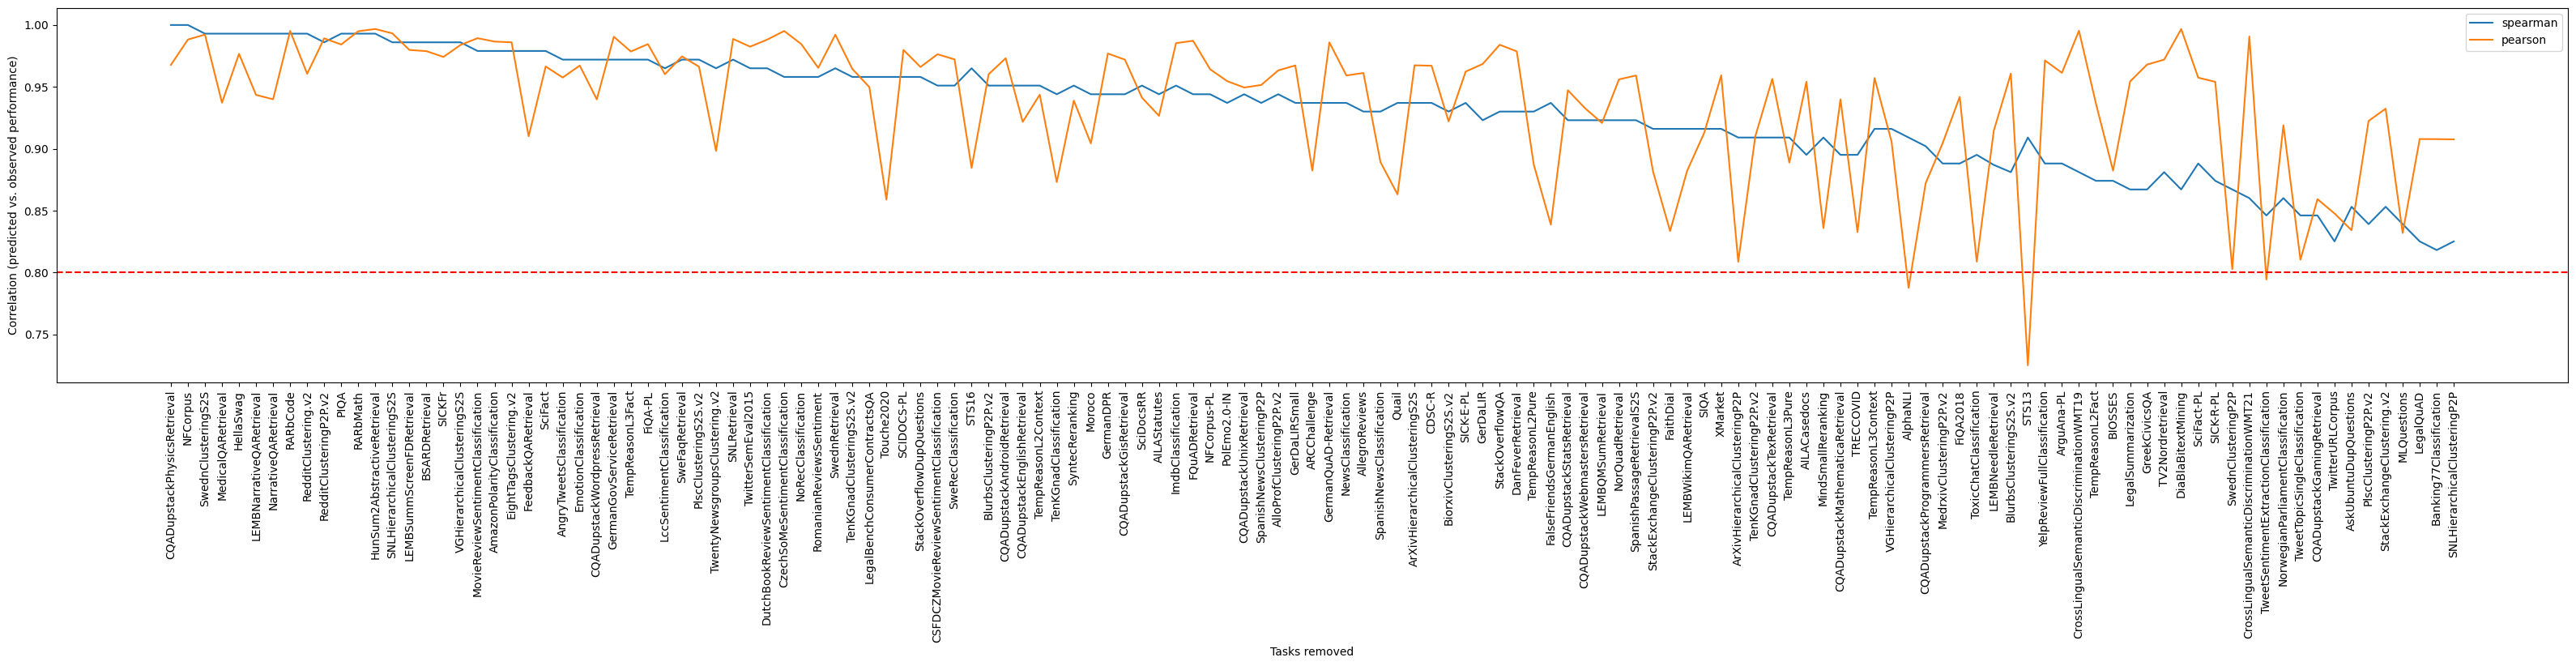

In [21]:
# plotting the predictability scores with the tasks removed
import matplotlib.pyplot as plt

# make the plot wider
plt.figure(figsize=(40, 6))

for metric in ["spearman", "pearson"]:
    plt.plot([t[metric] for t in predicability_scores], label=metric)

plt.xlabel("Tasks removed")
plt.ylabel("Correlation (predicted vs. observed performance)")
plt.legend()

# add vline for 0.8 spearman
plt.axhline(y=0.8, color="r", linestyle="--")

# add task names to the x-axis
plt.xticks(range(len(tasks_removed)), tasks_removed, rotation=90)
plt.show()

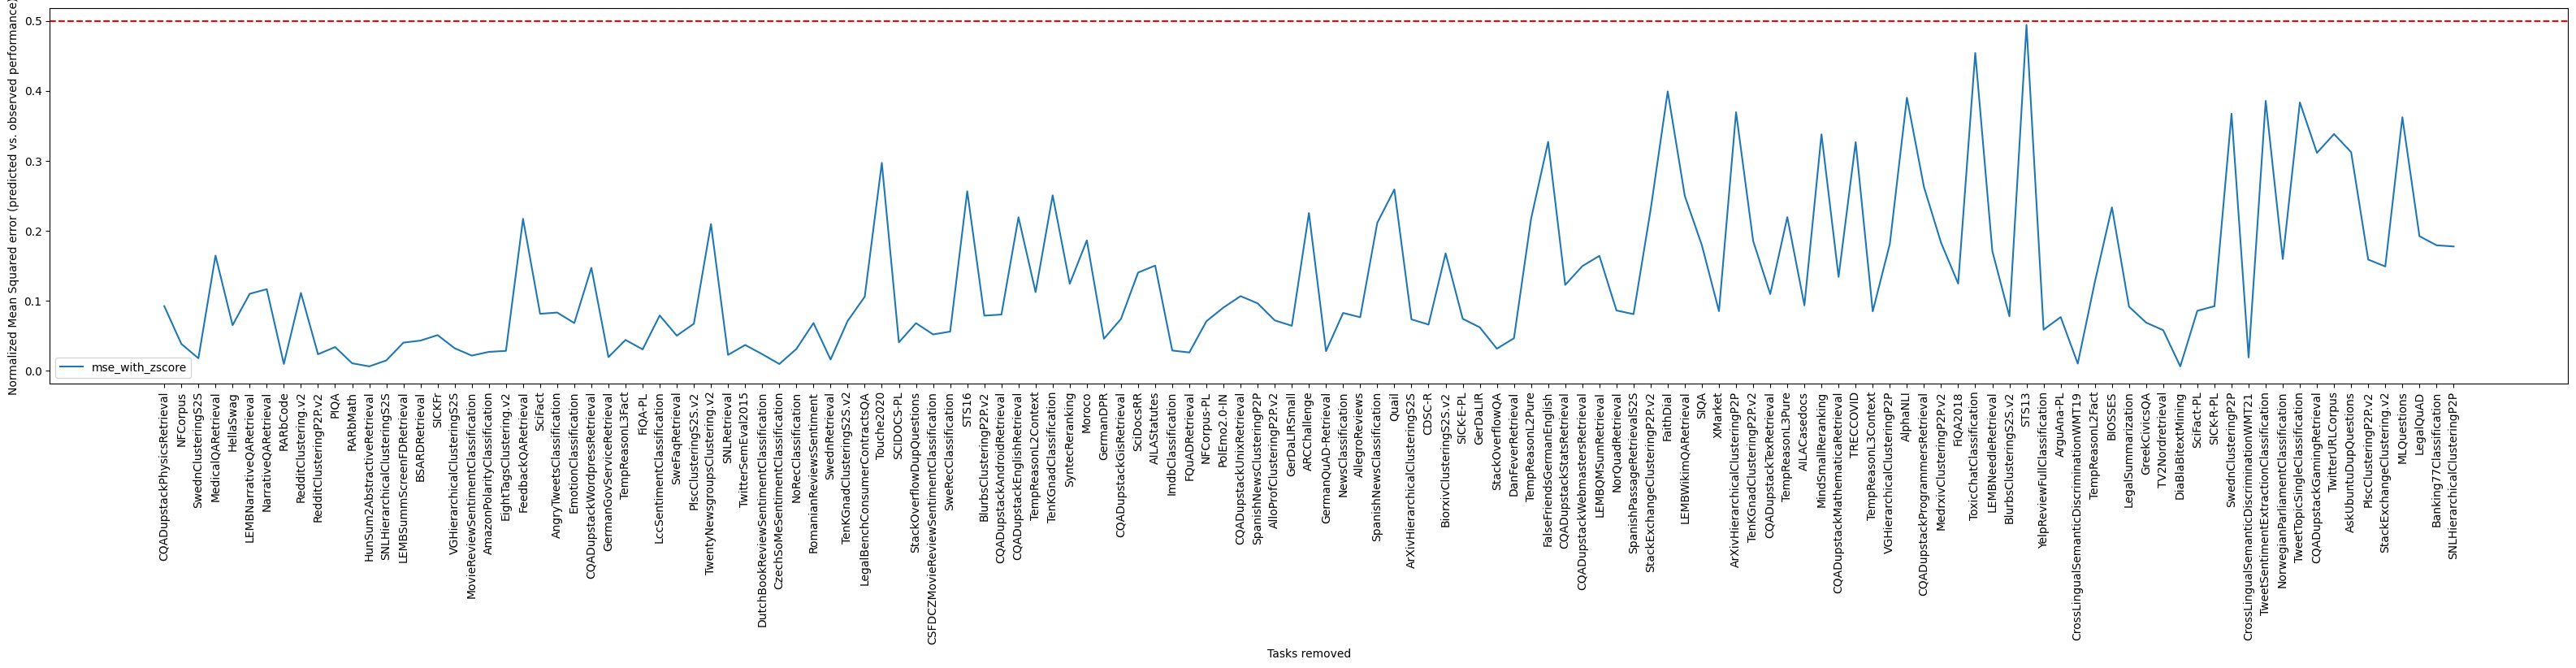

In [22]:
# plotting the predictability scores with the tasks removed

plt.figure(figsize=(40, 6))

for metric in ["mse_with_zscore"]:
    plt.plot([t[metric] for t in predicability_scores], label=metric)

plt.xlabel("Tasks removed")
plt.ylabel("Normalized Mean Squared error (predicted vs. observed performance)")
plt.legend()

# add vline for 0.5 mse
plt.axhline(y=0.5, color="r", linestyle="--")

# add task names to the x-axis
plt.xticks(range(len(tasks_removed)), tasks_removed, rotation=90)
plt.show()

## Constructing the Benchmark

In [23]:
# we now have the tasks:
tasks_to_select_from

['BornholmBitextMining',
 'BibleNLPBitextMining',
 'BUCC.v2',
 'FloresBitextMining',
 'IWSLT2017BitextMining',
 'NorwegianCourtsBitextMining',
 'NTREXBitextMining',
 'Tatoeba',
 'SRNCorpusBitextMining',
 'VieMedEVBitextMining',
 'BulgarianStoreReviewSentimentClassfication',
 'CzechProductReviewSentimentClassification',
 'GreekLegalCodeClassification',
 'DBpediaClassification',
 'FinancialPhrasebankClassification',
 'PoemSentimentClassification',
 'ToxicConversationsClassification',
 'EstonianValenceClassification',
 'ItaCaseholdClassification',
 'AmazonCounterfactualClassification',
 'AmazonReviewsClassification',
 'CataloniaTweetClassification',
 'MassiveIntentClassification',
 'MassiveScenarioClassification',
 'MTOPDomainClassification',
 'MTOPIntentClassification',
 'MultiHateClassification',
 'NordicLangClassification',
 'ScalaClassification',
 'SwissJudgementClassification',
 'TweetSentimentClassification',
 'CBD',
 'PolEmo2.0-OUT',
 'PAC',
 'CSFDSKMovieReviewSentimentClassificati

In [24]:
tasks = mteb.get_tasks(tasks=tasks_to_select_from, languages=eu_languages)

# we can now create a benchmark
benchmark = mteb.Benchmark(
    name="mteb(eu)",
    tasks=tasks,
    description="Benchmark for evaluating document embedding models for European languages",
    citation="",
    reference="",
)

In [25]:
# create a dataframe with tasks
import pandas as pd

data = []

eu_langs = set(eu_languages)

for t in tasks:
    data.append(
        {
            "Name": t.metadata.name,
            "Type": t.metadata.type,
            "Languages": set(t.metadata.languages) & eu_langs,
            "Domains": t.metadata.domains,
            "License": t.metadata.license,
            "Description": t.metadata.description,
        }
    )

tasks_df = pd.DataFrame(data)
# tasks_df

# print all rows
pd.set_option("display.max_rows", 150)
tasks_df

,Name,Type,Languages,Domains,License,Description
0,BornholmBitextMining,BitextMining,{dan},"[Web, Social, Fiction, Written]",CC-BY-4.0,Danish Bornholmsk Parallel Corpus. Bornholmsk ...
1,BibleNLPBitextMining,BitextMining,"{por, lit, hun, pol, eng, fra, dan, ita, nld, ...","[Religious, Written]",CC-BY-SA-4.0,"Partial Bible translations in 829 languages, a..."
2,BUCC.v2,BitextMining,"{eng, deu, fra}",[Written],Unknown,BUCC bitext mining dataset
3,FloresBitextMining,BitextMining,"{isl, fin, pol, ron, gle, swe, hrv, fra, nno, ...","[Non-fiction, Encyclopaedic, Written]",CC BY-SA 4.0,FLORES is a benchmark dataset for machine tran...
4,IWSLT2017BitextMining,BitextMining,"{eng, fra, ita, nld, ron, deu}","[Non-fiction, Fiction, Written]",CC-BY-NC-ND-4.0,The IWSLT 2017 Multilingual Task addresses tex...
5,NorwegianCourtsBitextMining,BitextMining,"{nob, nno}","[Legal, Written]",CC BY 4.0,Nynorsk and Bokmål parallel corpus from Norweg...
6,NTREXBitextMining,BitextMining,"{isl, fin, pol, ron, gle, swe, hrv, fra, nno, ...","[News, Written]",CC-BY-SA-4.0,NTREX is a News Test References dataset for Ma...
7,Tatoeba,BitextMining,"{isl, fin, pol, ron, gle, swe, hrv, fra, nno, ...",[Written],CC BY 2.0,"1,000 English-aligned sentence pairs for each ..."
8,SRNCorpusBitextMining,BitextMining,{nld},"[Social, Web, Written]",CC-BY-SA-4.0,SRNCorpus is a machine translation corpus for ...
9,VieMedEVBitextMining,BitextMining,{eng},"[Medical, Written]",cc-by-nc,A high-quality Vietnamese-English parallel dat...


## Reviewed

To ensure that these tasks are appropriate we ask speakers of the language to suggest improve upon the selection of the tasks:

| Name                                 | Evaluated languages            |
|--------------------------------------|--------------------------------|
| Kenneth Enevoldsen (@KennethEnevoldsen) | Danish (dan), English (eng), Swedish (swe), Norwegian (nno, nob) |

Kenneth: 
  - Norwegian: looks reasonable both datasets are good
  - Danish: 
    - ~~`DanishPoliticalCommentsClassification` has a questionable license and quality (have added filtering based on missing license added)~~ 
    - Danish looks reasonable
  - Swedish: Dataset is reasonable
  - English: Might be worth excluding 
    - ~~`NusaXBitextMining`, `NollySentiBitextMining`, `IN22ConvBitextMining`, and `IndicGenBenchFloresBitextMining`. Given their targets~~
    - ~~Might be worth removing legal benchmark tasks (CUAD, MUAD etc.)? Not really what the benchmark seeks to test (some legal would be reasonable, but 100+ seems excessive)~~
  - Other: 
    - ~~It might be worth excluding:`AfriSentiClassification` given its intended target.~~
    - ~~a few more non-EU tasks (notably Masakhane tasks)~~
    - ~~some code-retrieval tasks in the benchmark~~